In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from itertools import product
import matplotlib.pyplot as plt

# load dataset 5

In [2]:
df = pd.read_csv('5_interest_rate.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137500 entries, 0 to 137499
Data columns (total 36 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              137495 non-null  float64
 1   action_taken                              137500 non-null  int64  
 2   loan_type                                 137500 non-null  int64  
 3   lien_status                               137500 non-null  int64  
 4   reverse_mortgage                          137500 non-null  int64  
 5   open_end_line_of_credit                   137500 non-null  int64  
 6   loan_amount                               137500 non-null  int64  
 7   combined_loan_to_value_ratio              137205 non-null  object 
 8   interest_rate                             137500 non-null  object 
 9   total_loan_costs                          110512 non-null  object 
 10  origination_charges 

In [4]:
df.head()

,census_tract,action_taken,loan_type,lien_status,reverse_mortgage,open_end_line_of_credit,loan_amount,combined_loan_to_value_ratio,interest_rate,total_loan_costs,...,co_applicant_sex,applicant_age,co_applicant_age,aus_1,applicant_race_1,applicant_race_2,co_applicant_race_1,co_applicant_race_2,applicant_ethnicity_1,co_applicant_ethnicity_1
0,4.209120e+10,1,1,1,2,2,355000,75.822,4.0-4.5,8352.71,...,2,1,7,1,5.0,NaN,5.0,NaN,2.0,2.0
1,5.513320e+10,1,2,1,2,2,285000,84.777,4.0-4.5,6854.68,...,2,1,1,6,5.0,NaN,5.0,NaN,2.0,2.0
2,6.073010e+09,1,1,1,2,2,475000,54.091,3.0-3.5,2288.0,...,2,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN
3,2.712304e+10,1,1,1,2,2,185000,64.615,3.0-3.5,1881.1,...,1,0,0,6,5.0,NaN,5.0,NaN,2.0,2.0
4,4.849102e+10,1,1,1,2,2,225000,85.92,3.5-4.0,3434.5,...,2,1,1,6,5.0,NaN,5.0,NaN,2.0,2.0


In [5]:
print(df['combined_loan_to_value_ratio'].value_counts())

80.0      24981
97.0       5377
75.0       5259
95.0       4950
90.0       3496
          ...  
71.682        1
72.517        1
92.162        1
54.611        1
75.02         1
Name: combined_loan_to_value_ratio, Length: 34608, dtype: int64


In [6]:
unique_categories = df['combined_loan_to_value_ratio'].nunique()
print("Number of Unique Categories:", unique_categories)

Number of Unique Categories: 34608


In [7]:
# First, convert the 'combined_loan_to_value_ratio' column to numeric (float)
df['combined_loan_to_value_ratio'] = pd.to_numeric(df['combined_loan_to_value_ratio'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df['combined_loan_to_value_ratio'].min()
maximum_interest_rate = df['combined_loan_to_value_ratio'].max()
median_interest_rate = df['combined_loan_to_value_ratio'].median()

print("Minimum combined_loan_to_value_ratio:", minimum_interest_rate)
print("Maximum combined_loan_to_value_ratio:", maximum_interest_rate)
print("Median combined_loan_to_value_ratio:", median_interest_rate)

Minimum combined_loan_to_value_ratio: 0.03
Maximum combined_loan_to_value_ratio: 93913.043
Median combined_loan_to_value_ratio: 75.0


In [8]:
# Convert the 'combined_loan_to_value_ratio' column to numeric (float)
df['combined_loan_to_value_ratio'] = pd.to_numeric(df['combined_loan_to_value_ratio'], errors='coerce')  # 'coerce' handles non-numeric values by converting them to NaN

# Calculate the quantiles
Q1 = df['combined_loan_to_value_ratio'].quantile(0.25)
Q3 = df['combined_loan_to_value_ratio'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['combined_loan_to_value_ratio'] < lower_bound) | (df['combined_loan_to_value_ratio'] > upper_bound)]

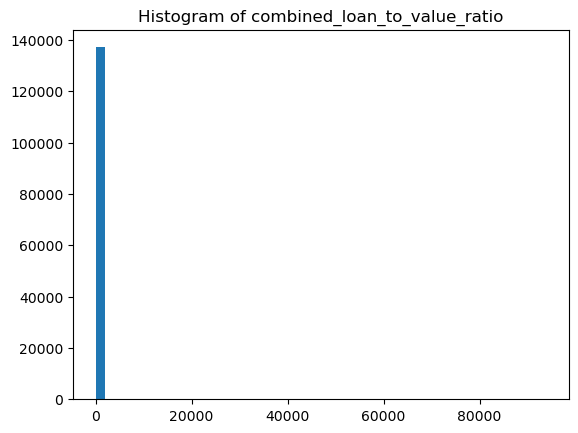

In [9]:
plt.hist(df['combined_loan_to_value_ratio'], bins=50)  # Adjust the number of bins as needed
plt.title('Histogram of combined_loan_to_value_ratio')
plt.show()

[75.822 84.777 54.091 ... 45.65  79.34  75.02 ]
406


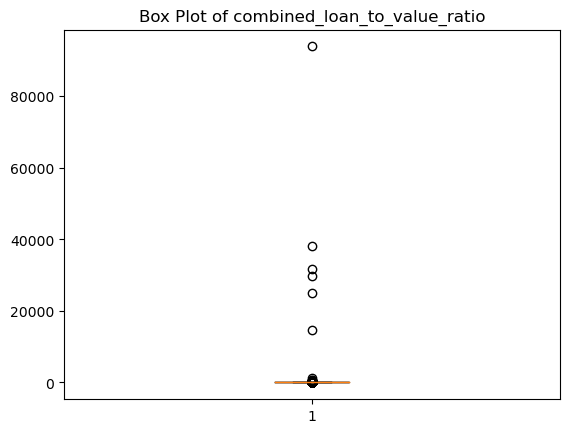

In [10]:
df1 = df.copy()
df1['combined_loan_to_value_ratio'] = pd.to_numeric(df['combined_loan_to_value_ratio'], errors='coerce')
df1 = df1.dropna(subset=['combined_loan_to_value_ratio'])

print(df['combined_loan_to_value_ratio'].unique())
print(df['combined_loan_to_value_ratio'].isna().sum())

# Create a box plot of the 'combined_loan_to_value_ratio' column
plt.boxplot(df1['combined_loan_to_value_ratio'])
plt.title('Box Plot of combined_loan_to_value_ratio')
plt.show()

## The outlier squashes the data.
We can draw a boxplot without the outlier.

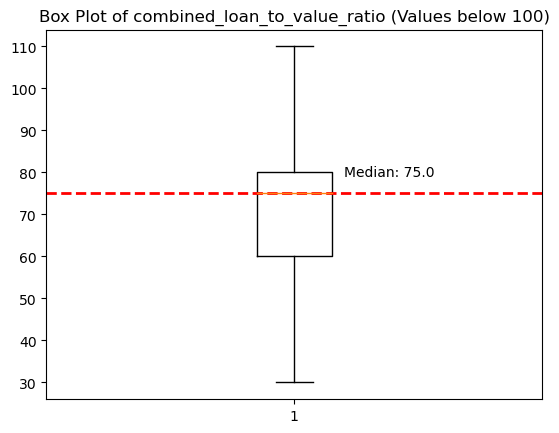

In [11]:
# Create a box plot of the 'combined_loan_to_value_ratio' column
plt.boxplot(df1['combined_loan_to_value_ratio'], showfliers=False)  # Exclude outliers
plt.title('Box Plot of combined_loan_to_value_ratio (Values below 100)')

# Calculate the median value
median_value = df1['combined_loan_to_value_ratio'].median()

# Add a median line
plt.axhline(median_value, color='r', linestyle='dashed', linewidth=2)

# Add text with the median value 5 pixels above the line
plt.text(1.1, median_value + 5, f'Median: {median_value}', va='center')

plt.show()

# Conclusion

##### A median combined loan-to-value (CLTV) ratio of 75 suggests that, in the dataset, the typical loan is issued with the borrower having equity in the property of approximately 75%. 
In the context of mortgages and lending, a CLTV ratio below 100% indicates that the borrower has some level of equity in the property.

In general, a lower CLTV ratio is often seen as less risky for lenders because it means the borrower has a larger stake in the property. 
A higher CLTV ratio, on the other hand, may indicate higher risk for the lender.

# Remove outliers

In [12]:
# Calculate the IQR for combined_loan_to_value_ratio
Q1 = df1['combined_loan_to_value_ratio'].quantile(0.25)
Q3 = df1['combined_loan_to_value_ratio'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for outliers
outliers_mask = (df1['combined_loan_to_value_ratio'] < lower_bound) | (df1['combined_loan_to_value_ratio'] > upper_bound)

# Create a new DataFrame without outliers
df_no_outliers = df1[~outliers_mask]

# Display the number of removed outliers
print(f'Number of removed outliers: {outliers_mask.sum()}')

Number of removed outliers: 4619


In [13]:
# Create a DataFrame of removed outliers
outliers_df = df1[outliers_mask]

# Display the values of the removed outliers
print(outliers_df['combined_loan_to_value_ratio'])

6         110.256
24         17.102
72         20.896
88         26.190
146        25.333
           ...   
137108     14.620
137194     17.490
137247     26.900
137392     27.080
137428     28.960
Name: combined_loan_to_value_ratio, Length: 4619, dtype: float64


In [14]:
print(df_no_outliers['combined_loan_to_value_ratio'].value_counts())

80.000     24981
97.000      5377
75.000      5259
95.000      4950
90.000      3496
           ...  
50.692         1
64.372         1
57.199         1
100.931        1
75.020         1
Name: combined_loan_to_value_ratio, Length: 31555, dtype: int64


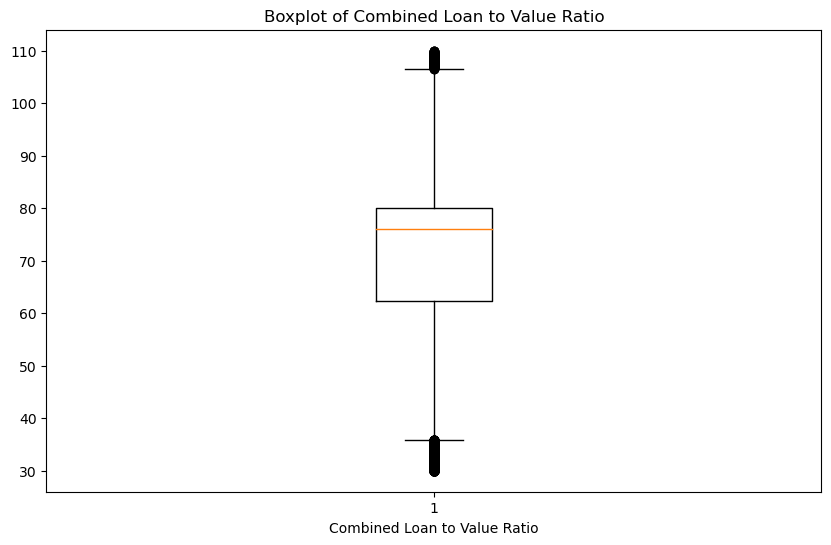

In [15]:
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers['combined_loan_to_value_ratio'])
plt.title('Boxplot of Combined Loan to Value Ratio')
plt.xlabel('Combined Loan to Value Ratio')
plt.show()

In [16]:
print(df_no_outliers['combined_loan_to_value_ratio'].value_counts())

80.000     24981
97.000      5377
75.000      5259
95.000      4950
90.000      3496
           ...  
50.692         1
64.372         1
57.199         1
100.931        1
75.020         1
Name: combined_loan_to_value_ratio, Length: 31555, dtype: int64


In [17]:
# First, convert the 'combined_loan_to_value_ratio' column to numeric (float)
df_no_outliers.loc[:, 'combined_loan_to_value_ratio'] = pd.to_numeric(df_no_outliers['combined_loan_to_value_ratio'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df_no_outliers['combined_loan_to_value_ratio'].min()
maximum_interest_rate = df_no_outliers['combined_loan_to_value_ratio'].max()
median_interest_rate = df_no_outliers['combined_loan_to_value_ratio'].median()

print("Minimum Interest Rate:", minimum_interest_rate)
print("Maximum Interest Rate:", maximum_interest_rate)
print("Median Interest Rate:", median_interest_rate)

Minimum Interest Rate: 30.0
Maximum Interest Rate: 110.0
Median Interest Rate: 76.121


C:\Users\marku\AppData\Local\Temp\ipykernel_10700\3072740982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.loc[:, 'combined_loan_to_value_ratio'] = pd.to_numeric(df_no_outliers['combined_loan_to_value_ratio'], errors='coerce')


# Make range categories

In [18]:
# Convert the 'combined_loan_to_value_ratio' column to numeric
new_df = df_no_outliers.copy()

# Define a function to categorize combined_loan_to_value_ratio into the desired ranges
def categorize_combined_loan_to_value_ratio(ratio):
    if ratio >= 25.0 and ratio <= 30.0:
        return '25.0-30.0'
    elif ratio > 30.0 and ratio <= 35.0:
        return '30.0-35.0'
    elif ratio > 35.0 and ratio <= 40.0:
        return '35.0-40.0'
    elif ratio > 40.0 and ratio <= 45.0:
        return '40.0-45.0'
    elif ratio > 45.0 and ratio <= 50.0:
        return '45.0-50.0'
    elif ratio > 50.0 and ratio <= 55.0:
        return '50.0-55.0'
    elif ratio > 55.0 and ratio <= 60.0:
        return '55.0-60.0'
    elif ratio > 60.0 and ratio <= 65.0:
        return '60.0-65.0'
    elif ratio > 65.0 and ratio <= 70.0:
        return '65.0-70.0'
    elif ratio > 70.0 and ratio <= 75.0:
        return '70.0-75.0'
    elif ratio > 75.0 and ratio <= 80.0:
        return '75.0-80.0'
    elif ratio > 80.0 and ratio <= 85.0:
        return '80.0-85.0'
    elif ratio > 85.0 and ratio <= 90.0:
        return '85.0-90.0'
    elif ratio > 90.0 and ratio <= 95.0:
        return '90.0-95.0'
    elif ratio > 95.0 and ratio <= 100.0:
        return '95.0-100.0'
    elif ratio > 100.0 and ratio <= 120.0:
        return '100.0-120.0'
    else:
        return 'Other'

# Apply the categorization function to 'combined_loan_to_value_ratio' column
new_df['combined_loan_to_value_ratio'] = new_df['combined_loan_to_value_ratio'].apply(categorize_combined_loan_to_value_ratio)

# Print the result
print(new_df['combined_loan_to_value_ratio'].value_counts())

75.0-80.0      35573
70.0-75.0      14822
65.0-70.0      12256
95.0-100.0      9703
55.0-60.0       9140
85.0-90.0       8540
90.0-95.0       7945
60.0-65.0       7497
50.0-55.0       6089
45.0-50.0       5588
80.0-85.0       5060
40.0-45.0       3971
35.0-40.0       3129
30.0-35.0       2342
100.0-120.0      768
25.0-30.0         52
Name: combined_loan_to_value_ratio, dtype: int64


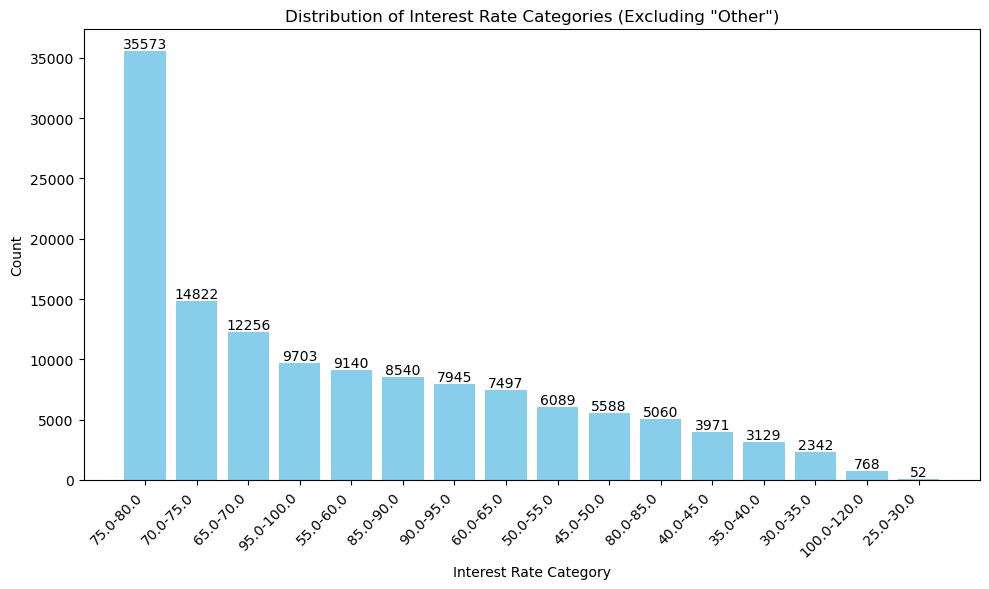

In [19]:
# Filter the DataFrame to exclude the 'Other' category
filtered_df = new_df[new_df['combined_loan_to_value_ratio'] != 'Other']

# Get the value counts for the filtered DataFrame
value_counts = filtered_df['combined_loan_to_value_ratio'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Interest Rate Category')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate Categories (Excluding "Other")')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Display the counts on top of the bars
for i, count in enumerate(value_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [20]:
df.to_csv('6_combined_loan_to_value_ratio.csv', index=False)